# load TCR 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import muon as mu
import numpy as np
import scanpy as sc
import scirpy as ir
from cycler import cycler
from matplotlib import cm as mpl_cm
from matplotlib import pyplot as plt
from mudata import MuData
sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [2]:
%cd /ihome/ylee/yiz133/Code/Scirpy/scripy/data

/ihome/ylee/yiz133/Code/Scirpy/scripy/data


In [23]:
## read filtered data
mdata_filtered = mu.read("0605_all_Common_DEtop2000.h5mu")
mdata_filtered

MuData object with n_obs × n_vars = 77559 × 2000
  obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'percent.mt', 'integrated_nn_res.2', 'seurat_clusters', 'level_2_clusters', 'manual_cell_type', 'run_num', 'sample'
  2 modalities
    gex:	77559 x 2000
      obs:	'mouse_id', 'date', 'tissue', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'hvg', 'log1p'
    airr:	77559 x 0
      obsm:	'airr'

In [24]:
# filter mt- genes
mdata_filtered = mdata_filtered[:, ~mdata_filtered.var_names.str.startswith('mt')].copy()
mdata_filtered["gex"].obs['manual_cell_type'] = mdata_filtered.obs['manual_cell_type']
mdata_filtered

MuData object with n_obs × n_vars = 77559 × 2000
  obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'percent.mt', 'integrated_nn_res.2', 'seurat_clusters', 'level_2_clusters', 'manual_cell_type', 'run_num', 'sample'
  2 modalities
    gex:	77559 x 2000
      obs:	'mouse_id', 'date', 'tissue', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'manual_cell_type'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'hvg', 'log1p'
    airr:	77559 x 0
      obsm:	'airr'

In [25]:
# exclude 2D2 transfer samples
selected_samples_id = ["CMO301", "CMO302", "CMO318", "CMO325", "CMO323"]
selected_date = ["0516"]
selected_tissue = ["CN"]

mdata_filtered = mdata_filtered[~ (mdata_filtered.mod["gex"].obs["mouse_id"].isin(selected_samples_id) & mdata_filtered.mod["gex"].obs["date"].isin(selected_date))]

# positive select
# mdata_filtered = mdata_filtered[mdata_filtered.mod["gex"].obs["date"].isin(["0605"]) ]

# # cell type select
# mdata_filtered = mdata_filtered[mdata_filtered["gex"].obs["manual_cell_type"].isin(["CD8+ T", "CD4+ T", "Treg"])]

mdata_filtered

View of MuData object with n_obs × n_vars = 65135 × 2000
  obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'percent.mt', 'integrated_nn_res.2', 'seurat_clusters', 'level_2_clusters', 'manual_cell_type', 'run_num', 'sample'
  2 modalities
    gex:	65135 x 2000
      obs:	'mouse_id', 'date', 'tissue', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'manual_cell_type'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'hvg', 'log1p'
    airr:	65135 x 0
      obsm:	'airr'

In [6]:
## read raw data
adata_gex = sc.read("all_gex.h5ad")
adata_tcr = sc.read("all_tcr.h5ad")
mdata_all = mu.MuData({"gex": adata_gex, "airr": adata_tcr})
mdata_all

MuData object with n_obs × n_vars = 106435 × 33708
  2 modalities
    gex:	106435 x 33708
      obs:	'mouse_id', 'date', 'tissue'
    airr:	77660 x 0
      obsm:	'airr'

In [7]:
tr_genes_gex = mdata_all['gex'].var_names[mdata_all['gex'].var_names.str.startswith(('Trav', 'Traj','Trbv','Trbj'))]
tr_genes_gex

Index(['Trbv1', 'Trbv2', 'Trbv3', 'Trbv4', 'Trbv5', 'Trbv6', 'Trbv7', 'Trbv8',
       'Trbv9', 'Trbv10',
       ...
       'Traj11', 'Traj9', 'Traj8', 'Traj7', 'Traj6', 'Traj5', 'Traj4', 'Traj3',
       'Traj2', 'Traj1'],
      dtype='object', length=239)

## merge TCR genes to mdata

In [26]:
mdata = mdata_filtered.copy()

ir.pp.index_chains(mdata)
ir.tl.chain_qc(mdata, key_added=('receptor_type', 'receptor_subtype', 'chain_pairing'))
mdata

Filtering chains...
Indexing VJ chains...
Indexing VDJ chains...
build result array
Stored result in `mdata.obs["airr:receptor_type"]`.
Stored result in `mdata.obs["airr:receptor_subtype"]`.
Stored result in `mdata.obs["airr:chain_pairing"]`.


MuData object with n_obs × n_vars = 65135 × 2000
  obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'percent.mt', 'integrated_nn_res.2', 'seurat_clusters', 'level_2_clusters', 'manual_cell_type', 'run_num', 'sample'
  2 modalities
    gex:	65135 x 2000
      obs:	'mouse_id', 'date', 'tissue', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'manual_cell_type'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'hvg', 'log1p'
    airr:	65135 x 0
      obs:	'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [27]:
mdata['airr'].obs['chain_pairing'].value_counts()

chain_pairing
single pair        43976
extra VJ            8930
extra VDJ           4531
orphan VDJ          3173
two full chains     2857
orphan VJ           1668
Name: count, dtype: int64

In [42]:
meta_DF = ir.get.airr(mdata['airr'],  ["cdr3_aa", "consensus_count", "v_call", "j_call"] ,  ('VJ_1', 'VDJ_1'))

# , "high_confidence","productive"

# ('VJ_1', 'VDJ_1', 'VJ_2', 'VDJ_2'), 

meta_DF

VJ_1_cdr3_aa VJ_1_consensus_count  \
cell_id                                                            
AAACGGAGTCTACGGA-1_0516_CNS   AASDLSSNTNKVV                 2069   
AAAGCGTAGGCAACGA-1_0516_CNS      AIDPGGYKVV                 1548   
AACCACTCAATGGTCT-1_0516_CNS     ALWELGNNRIF                  233   
AACCAGACACGGCAAG-1_0516_CNS      AADSAGNKLT                   40   
AAGGTGTAGCCCAACG-1_0516_CNS     AAAYQGGRALI                  234   
...                                     ...                  ...   
GTTGTGGGTGGAGCGA-1_0605_SPL    AASTSSGSWQLI                  335   
GTTGTGGGTGGATCGC-1_0605_SPL    ALGDDTGYQNFY                 1216   
GTTGTGGGTGGCTGTA-1_0605_SPL    ALDLNTGYQNFY                  768   
GTTGTGGGTGTCCCTG-1_0605_SPL      ALTASLGKLQ                 1015   
GTTGTGGGTGTTACCC-1_0605_SPL  AVRRNTGGLSGKLT                 1630   

                                VJ_1_v_call VJ_1_j_call   VDJ_1_cdr3_aa  \
cell_id                                                                   
AAACGGAGTCTACGGA-1_0516_CNS         TRAV7-4      TRAJ34      GARETTETLY   
AAAGCGTAGGCAACGA-1_0516_CNS       TRAV13N-2      TRAJ12      ASGDGGREQY   
AACCACTCAATGGTCT-1_0516_CNS  TRAV15-1-DV6-1      TRAJ31   ASSFGTGGYAEQF   
AACCAGACACGGCAAG-1_0516_CNS        TRAV4N-3      TRAJ17    TCSAETASYEQY   
AAGGTGTAGCCCAACG-1_0516_CNS       TRAV14N-2      TRAJ15            None   
...                                     ...         ...             ...   
GTTGTGGGTGGAGCGA-1_0605_SPL        TRAV7D-2      TRAJ22      GARDINERLF   
GTTGTGGGTGGATCGC-1_0605_SPL        TRAV6N-7      TRAJ49       AWRVSTEVF   
GTTGTGGGTGGCTGTA-1_0605_SPL        TRAV13-1      TRAJ49  ASSLDLGGDQDTQY   
GTTGTGGGTGTCCCTG-1_0605_SPL         TRAV6-1      TRAJ24      ASGSKNTEVF   
GTTGTGGGTGTTACCC-1_0605_SPL         TRAV7-3       TRAJ2      ASSLGQTEVF   

                            VDJ_1_consensus_count       VDJ_1_v_call  \
cell_id                                                                
AAACGGAGTCTACGGA-1_0516_CNS                  2903             TRBV20   
AAAGCGTAGGCAACGA-1_0516_CNS                  2807  TRBV12-2+TRBV13-2   
AACCACTCAATGGTCT-1_0516_CNS                   150             TRBV10   
AACCAGACACGGCAAG-1_0516_CNS                   563              TRBV1   
AAGGTGTAGCCCAACG-1_0516_CNS                  None               None   
...                                           ...                ...   
GTTGTGGGTGGAGCGA-1_0605_SPL                  1490             TRBV20   
GTTGTGGGTGGATCGC-1_0605_SPL                   896             TRBV31   
GTTGTGGGTGGCTGTA-1_0605_SPL                   605             TRBV16   
GTTGTGGGTGTCCCTG-1_0605_SPL                   920  TRBV12-2+TRBV13-2   
GTTGTGGGTGTTACCC-1_0605_SPL                  1829             TRBV26   

                            VDJ_1_j_call  
cell_id                                   
AAACGGAGTCTACGGA-1_0516_CNS      TRBJ2-3  
AAAGCGTAGGCAACGA-1_0516_CNS      TRBJ2-7  
AACCACTCAATGGTCT-1_0516_CNS      TRBJ2-1  
AACCAGACACGGCAAG-1_0516_CNS      TRBJ2-7  
AAGGTGTAGCCCAACG-1_0516_CNS         None  
...                                  ...  
GTTGTGGGTGGAGCGA-1_0605_SPL      TRBJ1-4  
GTTGTGGGTGGATCGC-1_0605_SPL      TRBJ1-1  
GTTGTGGGTGGCTGTA-1_0605_SPL      TRBJ2-5  
GTTGTGGGTGTCCCTG-1_0605_SPL      TRBJ1-1  
GTTGTGGGTGTTACCC-1_0605_SPL      TRBJ1-1  

[65135 rows x 8 columns]

In [29]:
vdj_columns = ['VJ_1_v_call', 'VJ_1_j_call', 'VDJ_1_v_call', 'VDJ_1_j_call']
for col in vdj_columns:
    meta_DF[col] = meta_DF[col].str.split('+').str[0]


VJ_1_cdr3_aa VJ_1_consensus_count  \
cell_id                                                           
AAACGGAGTCTACGGA-1_0516_CNS  AASDLSSNTNKVV                 2069   
AAAGCGTAGGCAACGA-1_0516_CNS     AIDPGGYKVV                 1548   
AACCACTCAATGGTCT-1_0516_CNS    ALWELGNNRIF                  233   
AACCAGACACGGCAAG-1_0516_CNS     AADSAGNKLT                   40   
AAGGTGTAGCCCAACG-1_0516_CNS    AAAYQGGRALI                  234   
AAGTAGCAGATAGGCG-1_0516_CNS  ALSDLSTNTGKLT                 1887   
AAGTATACACCCAGTA-1_0516_CNS   AVRATSSGQKLV                  237   
AATGCGACACTAAAGG-1_0516_CNS      AVNNNNAPR                 1643   
AATTCGCCAGCTGTAT-1_0516_CNS    AADVGDNSKLI                  470   
ACAACGCTCCGAATCA-1_0516_CNS    AASRYNQGKLI                  220   

                                VJ_1_v_call VJ_1_j_call  VDJ_1_cdr3_aa  \
cell_id                                                                  
AAACGGAGTCTACGGA-1_0516_CNS         TRAV7-4      TRAJ34     GARETTETLY   
AAAGCGTAGGCAACGA-1_0516_CNS       TRAV13N-2      TRAJ12     ASGDGGREQY   
AACCACTCAATGGTCT-1_0516_CNS  TRAV15-1-DV6-1      TRAJ31  ASSFGTGGYAEQF   
AACCAGACACGGCAAG-1_0516_CNS        TRAV4N-3      TRAJ17   TCSAETASYEQY   
AAGGTGTAGCCCAACG-1_0516_CNS       TRAV14N-2      TRAJ15           None   
AAGTAGCAGATAGGCG-1_0516_CNS       TRAV12D-3      TRAJ27    ASSLAGAGQLY   
AAGTATACACCCAGTA-1_0516_CNS        TRAV9D-1      TRAJ16  ASSQETGDNERLF   
AATGCGACACTAAAGG-1_0516_CNS         TRAV7-3      TRAJ43    ASSPRQGYEQY   
AATTCGCCAGCTGTAT-1_0516_CNS        TRAV4N-4      TRAJ38  ASGDWGGARNTLY   
ACAACGCTCCGAATCA-1_0516_CNS          TRAV10      TRAJ23     ASGDVQDTQY   

                            VDJ_1_consensus_count VDJ_1_v_call VDJ_1_j_call  
cell_id                                                                      
AAACGGAGTCTACGGA-1_0516_CNS                  2903       TRBV20      TRBJ2-3  
AAAGCGTAGGCAACGA-1_0516_CNS                  2807     TRBV12-2      TRBJ2-7  
AACCACTCAATGGTCT-1_0516_CNS                   150       TRBV10      TRBJ2-1  
AACCAGACACGGCAAG-1_0516_CNS                   563        TRBV1      TRBJ2-7  
AAGGTGTAGCCCAACG-1_0516_CNS                  None         None         None  
AAGTAGCAGATAGGCG-1_0516_CNS                  2197        TRBV3      TRBJ2-2  
AAGTATACACCCAGTA-1_0516_CNS                   818        TRBV5      TRBJ1-4  
AATGCGACACTAAAGG-1_0516_CNS                  1374     TRBV12-2      TRBJ2-7  
AATTCGCCAGCTGTAT-1_0516_CNS                   680     TRBV12-2      TRBJ2-4  
ACAACGCTCCGAATCA-1_0516_CNS                   183     TRBV12-2      TRBJ2-5

In [30]:
for col in meta_DF.columns:
    mdata['airr'].obs[col] = meta_DF[col]
mdata

MuData object with n_obs × n_vars = 65135 × 2000
  obs:	'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'percent.mt', 'integrated_nn_res.2', 'seurat_clusters', 'level_2_clusters', 'manual_cell_type', 'run_num', 'sample'
  2 modalities
    gex:	65135 x 2000
      obs:	'mouse_id', 'date', 'tissue', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'manual_cell_type'
      var:	'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'hvg', 'log1p'
    airr:	65135 x 0
      obs:	'receptor_type', 'receptor_subtype', 'chain_pairing', 'VJ_1_cdr3_aa', 'VJ_1_consensus_count', 'VJ_1_v_call', 'VJ_1_j_call', 'VDJ_1_cdr3_aa', 'VDJ_1_consensus_count', 'VDJ_1_v_call', 'VDJ_1_j_call'
      uns:	'chain_indices'
      obsm:	'airr', 'chain_indices'

In [45]:
import pandas as pd

# meta_DF = pd.concat([mdata['gex'].obs['tissue'], meta_DF])

meta_DF['tissue'] = mdata['gex'].obs['tissue']
meta_DF

VJ_1_cdr3_aa VJ_1_consensus_count  \
cell_id                                                            
AAACGGAGTCTACGGA-1_0516_CNS   AASDLSSNTNKVV                 2069   
AAAGCGTAGGCAACGA-1_0516_CNS      AIDPGGYKVV                 1548   
AACCACTCAATGGTCT-1_0516_CNS     ALWELGNNRIF                  233   
AACCAGACACGGCAAG-1_0516_CNS      AADSAGNKLT                   40   
AAGGTGTAGCCCAACG-1_0516_CNS     AAAYQGGRALI                  234   
...                                     ...                  ...   
GTTGTGGGTGGAGCGA-1_0605_SPL    AASTSSGSWQLI                  335   
GTTGTGGGTGGATCGC-1_0605_SPL    ALGDDTGYQNFY                 1216   
GTTGTGGGTGGCTGTA-1_0605_SPL    ALDLNTGYQNFY                  768   
GTTGTGGGTGTCCCTG-1_0605_SPL      ALTASLGKLQ                 1015   
GTTGTGGGTGTTACCC-1_0605_SPL  AVRRNTGGLSGKLT                 1630   

                                VJ_1_v_call VJ_1_j_call   VDJ_1_cdr3_aa  \
cell_id                                                                   
AAACGGAGTCTACGGA-1_0516_CNS         TRAV7-4      TRAJ34      GARETTETLY   
AAAGCGTAGGCAACGA-1_0516_CNS       TRAV13N-2      TRAJ12      ASGDGGREQY   
AACCACTCAATGGTCT-1_0516_CNS  TRAV15-1-DV6-1      TRAJ31   ASSFGTGGYAEQF   
AACCAGACACGGCAAG-1_0516_CNS        TRAV4N-3      TRAJ17    TCSAETASYEQY   
AAGGTGTAGCCCAACG-1_0516_CNS       TRAV14N-2      TRAJ15            None   
...                                     ...         ...             ...   
GTTGTGGGTGGAGCGA-1_0605_SPL        TRAV7D-2      TRAJ22      GARDINERLF   
GTTGTGGGTGGATCGC-1_0605_SPL        TRAV6N-7      TRAJ49       AWRVSTEVF   
GTTGTGGGTGGCTGTA-1_0605_SPL        TRAV13-1      TRAJ49  ASSLDLGGDQDTQY   
GTTGTGGGTGTCCCTG-1_0605_SPL         TRAV6-1      TRAJ24      ASGSKNTEVF   
GTTGTGGGTGTTACCC-1_0605_SPL         TRAV7-3       TRAJ2      ASSLGQTEVF   

                            VDJ_1_consensus_count       VDJ_1_v_call  \
cell_id                                                                
AAACGGAGTCTACGGA-1_0516_CNS                  2903             TRBV20   
AAAGCGTAGGCAACGA-1_0516_CNS                  2807  TRBV12-2+TRBV13-2   
AACCACTCAATGGTCT-1_0516_CNS                   150             TRBV10   
AACCAGACACGGCAAG-1_0516_CNS                   563              TRBV1   
AAGGTGTAGCCCAACG-1_0516_CNS                  None               None   
...                                           ...                ...   
GTTGTGGGTGGAGCGA-1_0605_SPL                  1490             TRBV20   
GTTGTGGGTGGATCGC-1_0605_SPL                   896             TRBV31   
GTTGTGGGTGGCTGTA-1_0605_SPL                   605             TRBV16   
GTTGTGGGTGTCCCTG-1_0605_SPL                   920  TRBV12-2+TRBV13-2   
GTTGTGGGTGTTACCC-1_0605_SPL                  1829             TRBV26   

                            VDJ_1_j_call tissue  
cell_id                                          
AAACGGAGTCTACGGA-1_0516_CNS      TRBJ2-3     CN  
AAAGCGTAGGCAACGA-1_0516_CNS      TRBJ2-7     CN  
AACCACTCAATGGTCT-1_0516_CNS      TRBJ2-1     CN  
AACCAGACACGGCAAG-1_0516_CNS      TRBJ2-7     CN  
AAGGTGTAGCCCAACG-1_0516_CNS         None     CN  
...                                  ...    ...  
GTTGTGGGTGGAGCGA-1_0605_SPL      TRBJ1-4     SP  
GTTGTGGGTGGATCGC-1_0605_SPL      TRBJ1-1     SP  
GTTGTGGGTGGCTGTA-1_0605_SPL      TRBJ2-5     SP  
GTTGTGGGTGTCCCTG-1_0605_SPL      TRBJ1-1     SP  
GTTGTGGGTGTTACCC-1_0605_SPL      TRBJ1-1     SP  

[65135 rows x 9 columns]

In [ ]:
!cd /ihome/ylee/yiz133/Code/Data processing/4_Different_airr_in_clusters.ipynb

In [46]:
meta_DF.to_csv('tcr_rep.csv')

## cluster and plot

In [48]:
## recompute clonotype based aa seq
ir.pp.ir_dist(
    mdata,
    metric="tcrdist",
    sequence="aa",
    cutoff=15,
)

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.


In [50]:
ir.tl.define_clonotype_clusters(mdata, sequence="aa", metric="tcrdist", receptor_arms="all", dual_ir="any", same_v_gene=True)
ir.tl.clonotype_network(mdata, min_cells=15, sequence="aa", metric="tcrdist")

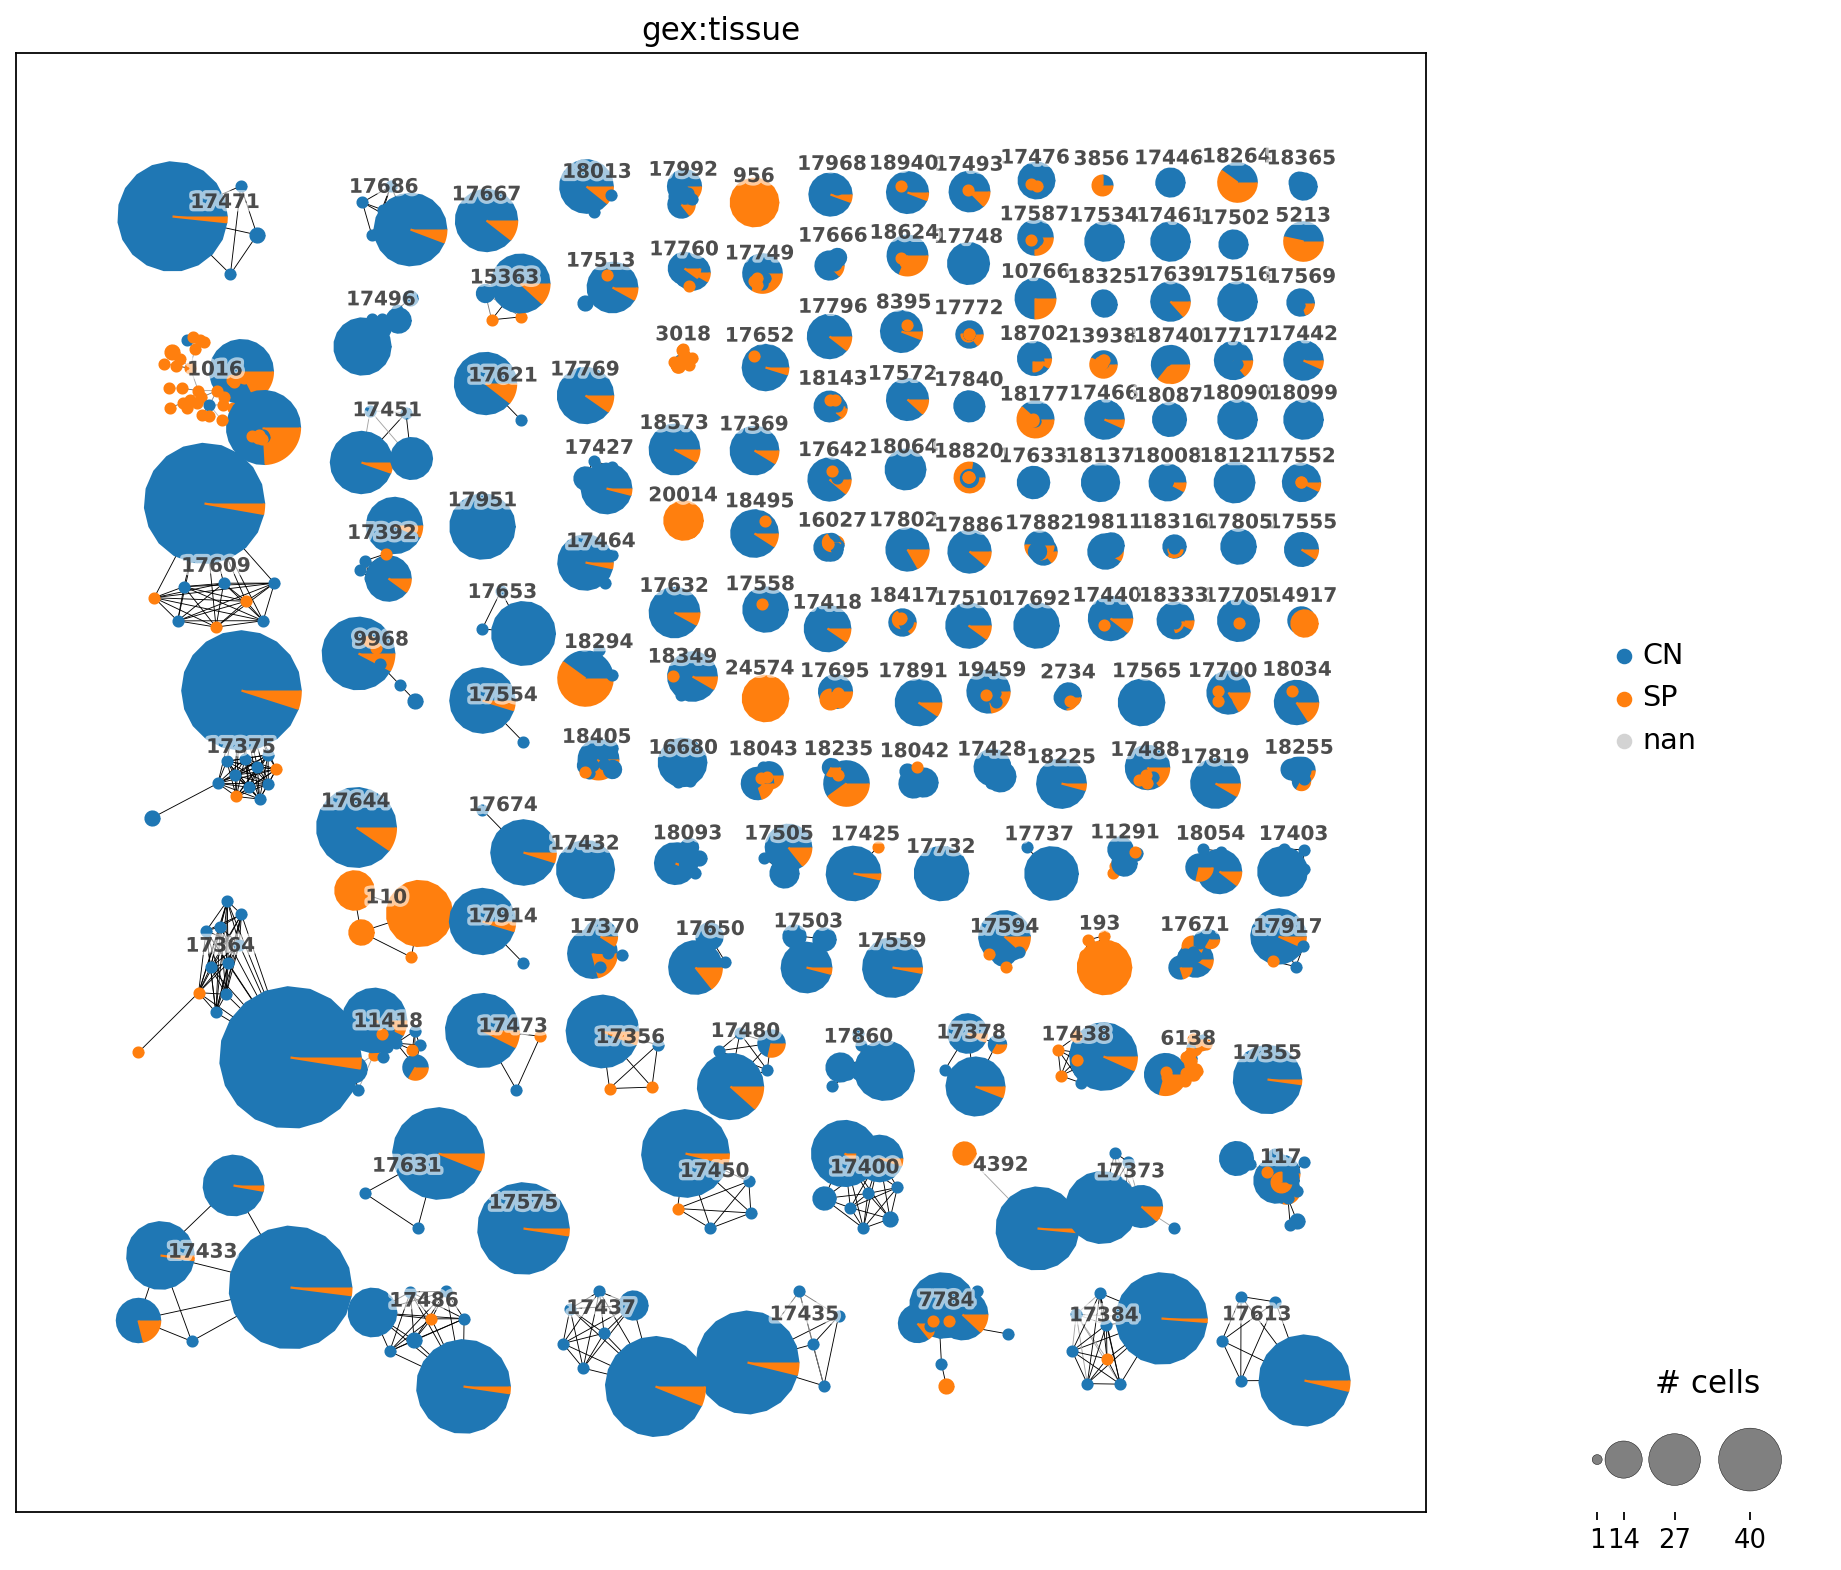

In [51]:
_ = ir.pl.clonotype_network(mdata, color="gex:tissue", label_fontsize=9, panel_size=(12,12), base_size=20)

In [32]:
sc.pp.pca(mdata["gex"], svd_solver="arpack", n_comps=20)

computing PCA
    with n_comps=20
    finished (0:00:02)


computing neighbors
    using 'X_pca' with n_pcs = 20
    finished (0:00:33)
computing UMAP
    finished (0:02:05)
running Leiden clustering
    finished (0:00:07)


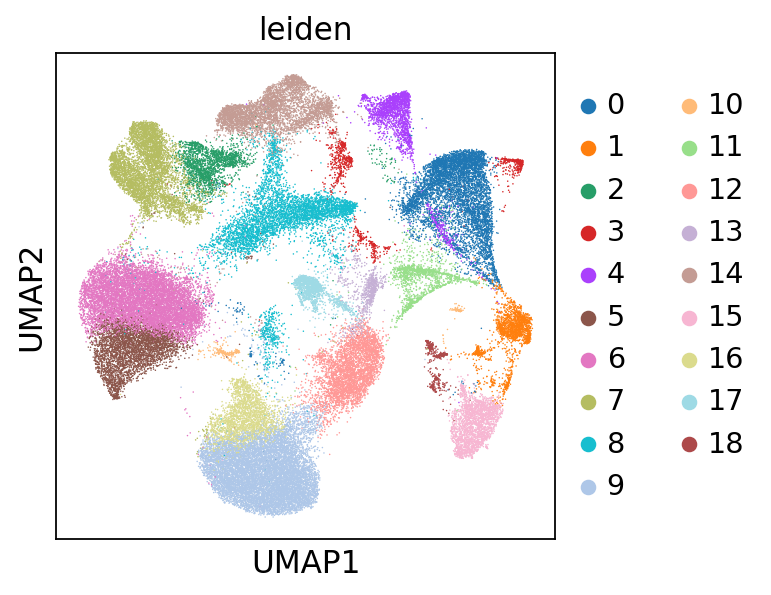

In [33]:
sc.pp.neighbors(mdata["gex"], n_neighbors = 50)
sc.tl.umap(mdata["gex"], min_dist=0.5, spread= 5.0)

sc.tl.leiden(mdata["gex"], resolution = 1.2, n_iterations=-1, flavor = 'igraph')
sc.pl.umap(mdata["gex"], color=["leiden"])

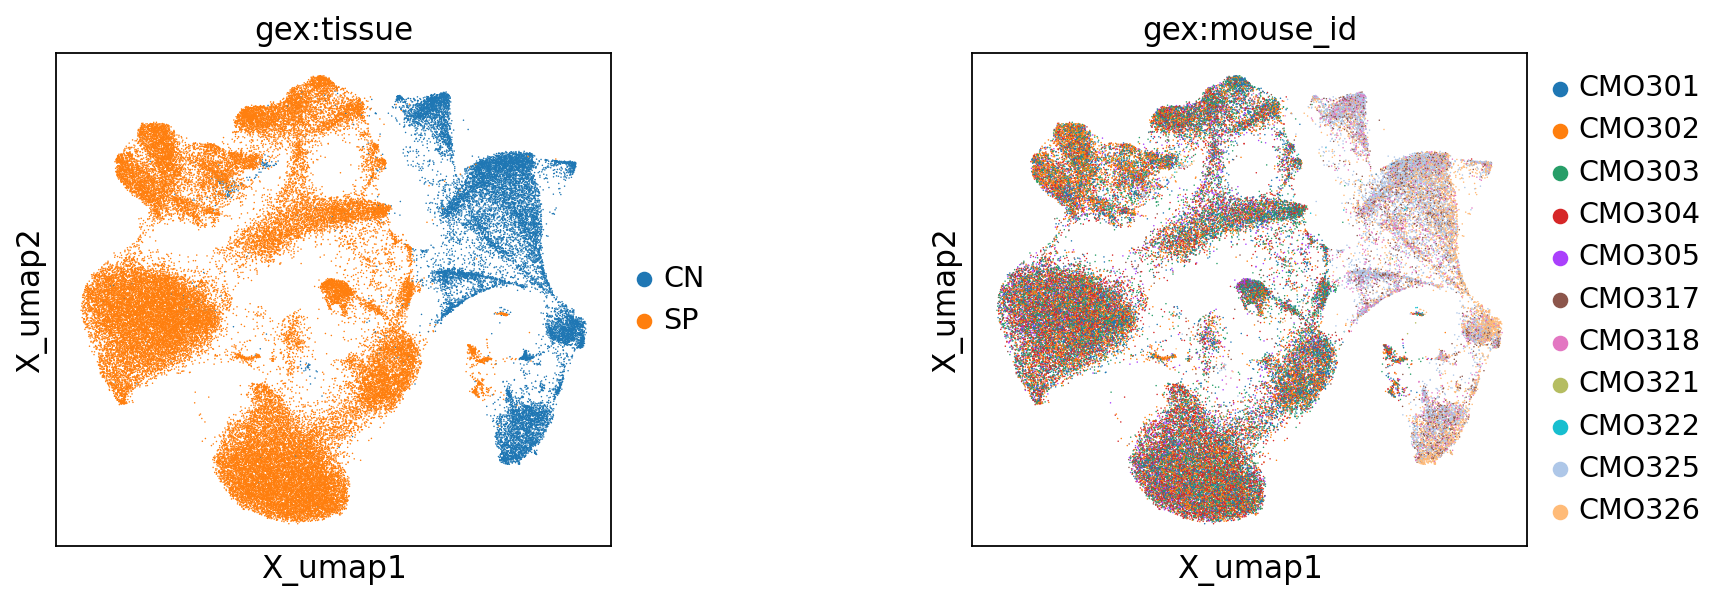

In [34]:
mu.pl.embedding(mdata, basis="gex:umap", color=['gex:tissue', 'gex:mouse_id'], wspace = 0.5)

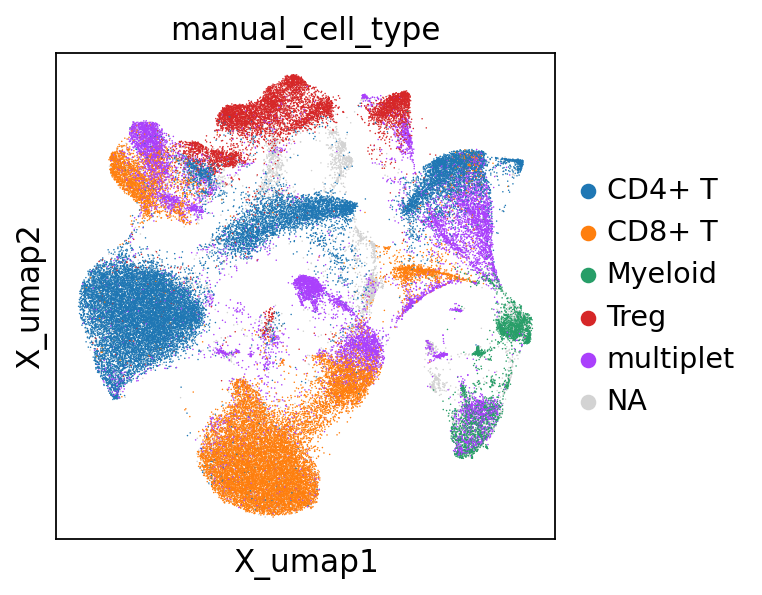

In [35]:
mu.pl.embedding(mdata, basis="gex:umap", color=['manual_cell_type'], wspace = 0.5)

In [36]:
subset = mdata[mdata["gex"].obs['leiden'] == '0']
subset['airr'].obs['VJ_1_v_call'].value_counts()

VJ_1_v_call
TRAV12-2            370
TRAV3N-3            282
TRAV9-4             266
TRAV7-4             261
TRAV7D-2            198
                   ... 
TRAV15D-1-DV6D-1      5
TRAV15N-2             3
TRAV13N-4             3
TRAV15-1-DV6-1        2
TRAV13D-3             1
Name: count, Length: 85, dtype: int64

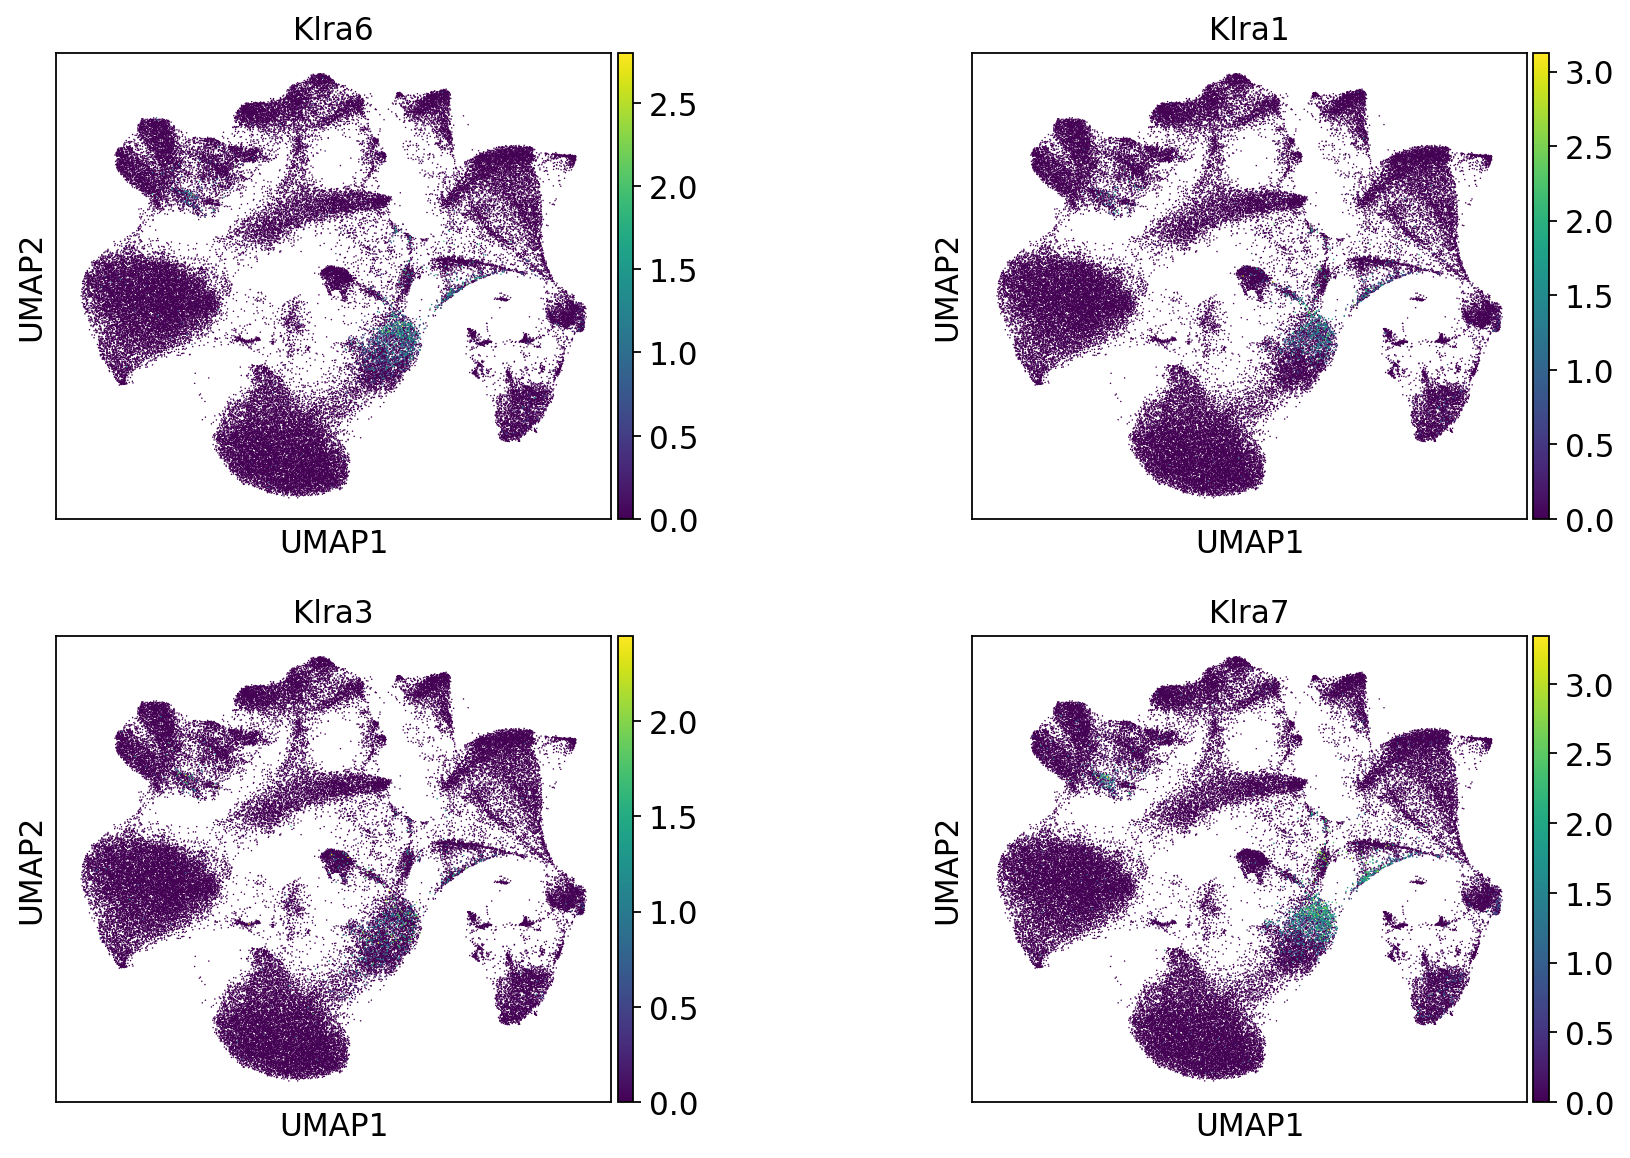

In [37]:
Kir_famili = ['Klra6', 'Klra1', 'Klra3', 'Klra7']
markers_in = []
for i in Kir_famili:
    if i in mdata["gex"].var_names:
        markers_in.append(i) 
markers_in

mu.pl.embedding(mdata["gex"], basis="umap", color= markers_in,  wspace = 0.5, ncols=2, vmin=0)